In [1]:
//%jsroot on

In [2]:
//%jsroot on
#define _adnum 0
#define _15C 28.3
Double_t theoff[12]={0.34,0.93,-0.5,-0.1,        -0.4,-0.7,0.5,-0.35,           1.2,1.44,0.8,0.95};

In [3]:
void getDraw(TGraph *g1,TString &fchName, TString &cutName, TString &graphName,TChain *fch,int *I){
        TGraph *e1=new TGraph();

        fch->Draw(fchName.Data(), cutName.Data());
        e1=(TGraph*)gPad->GetPrimitive("Graph");
        Int_t npoints=e1->GetN();
        if(npoints==0) return;
        cout<<"npoints="<<npoints<<'\n';
        Double_t *gx=e1->GetX();
        Double_t *gy=e1->GetY();
        /*g1 = new TGraph(*e1);*/
        /*Int_t n=0;*/
        for(Int_t i=0; i<npoints; i++){
                if(gx[i]==gx[i]&&gy[i]==gy[i]){
                        g1->SetPoint(*I,gx[i],gy[i]);
                        *I=*I+1;
                }
        }
        g1->SetNameTitle(graphName.Data(), graphName.Data());
}

In [4]:
void getDraw2D(TGraph *g1,TString &fchName, TString &cutName, TString &graphName,TChain *fch){
        Int_t num=fch->Draw(fchName.Data(),cutName.Data());
        if(num==0) return;
        TGraph2D *e1=new TGraph2D(num,fch->GetV3(),fch->GetV2(),fch->GetV1());
        Int_t npoints=e1->GetN();
        if(npoints==0) return;
        //cout<<"npoints="<<npoints<<'\n';
        TGraph2D *g2D=new TGraph2D(*e1);
        TString tmpgName;
        tmpgName="g2D"+graphName;
        g2D->SetNameTitle(tmpgName.Data(), tmpgName.Data());
        Double_t *gx=e1->GetX();
        Double_t *gy=e1->GetY();
        Double_t *gz=e1->GetZ();
    
//TGraph *T1Etheta_new=new TGraph();
Int_t count=0;
        for(Int_t i=0; i<npoints; i++){
          if(gx[i]>0)g1->SetPoint(count++,gy[i],gx[i]);
        }
        cout<<"count="<<count<<'\n';
        g2D->Write();
        //T1Etheta_new->SetMarkerStyle(3);
        //T1Etheta_new->Draw("ap");
        //T1Etheta_new->Write();     
}

In [5]:
void tarloss(Double_t *entar,int M,char str[100],Double_t _thick,Double_t Enow){
TGraph *g;
ifstream in(str);
string ss;
double a, b, e, dedx;
g=new TGraph;//定义新的二维散点图(TGraph) g1
if(in.is_open()){//检查文件是否存在
    getline(in,ss);
    int i=0;
    while(!in.eof())
    {
      in>>a>>b>>e>>dedx>>a>>b>>a>>b>>a>>b>>a>>b;
      // 对照数据文件进行理解。一列一列地读入，提取第3、4列数据。
      g->SetPoint(i++, e*M,dedx);//添加数据点到图中，能量单位为MeV/u，对C需乘以12.    
        }
 }
 in.close();
 double E0=0,E1=0,Esmall=0,E2=0,E=0,dE=0,e1=0,e2=0,e3=0,x=0,dx=0.001;//E0为能量总值，E为能量实时记录值，E1为穿透第一块硅时的能量，E2为穿透第二块时的能量
 Double_t d=(Double_t)(_thick);
 TGraph *gtar=new TGraph();
 for(Double_t ii=0;ii<10;ii++){
    x=0;
    E0=E=Enow*ii/5.;
    while(1)   //while循环即模拟粒子入射，每一个循环行进dx个步长，当能量小于零或从最后一个板射出时退出循环，开始下一次模拟
    {
    if((fabs(x-d)<=(dx/2)||(x>=0&&x<d))&&E<=0){/*cout<<"in tar"<<'\n';*/break;} //如果在靶中任何地方能量小于零，则第一块板沉积能量就是总能量，并退出本次模拟
    else if(fabs(x-d)<=(dx/2)&&E>0){gtar->SetPoint(ii,E,E0);break;}    //出射靶时，能量为初始能量减当前能量，并记录此时能量（亦即入射第二块硅的能量）
    dE=g->Eval(E);
    E=E-dE*dx;    //每一步长计算一次能损，改变一次能量
    x=x+dx;
    }
 }
    
 *entar=gtar->Eval(Enow)-Enow;
    
    //cout<<" thick="<<_thick<<" eall="<<Enow<<" etar="<<*entar<<'\n';
 }


In [6]:
//                      0Al   1ad1_Si   2Mylay   
//Double_t d[_N-1]={   0.5,   148.,     1., };
TFile *udead=new TFile("/home/zhuhy/JNBook/15C_Etheta/TA_E_theta/root/He3_ad2_173.root");
TTree *tudead=(TTree*) udead->Get("tree");
//tudead->Draw("se[0]:se[5]","se[7]<61");                    //总能量小于61时，与第5块硅pid单值
//c1->Draw();

In [7]:

Int_t *I,J=0;
I=&J;

int start = 453;
int stop = 530;
TChain *fch;
fch = new TChain("tree", "tele");
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtestn15_2/tele%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  fch->AddFile(fileName.Data());}

start = 748;
stop = 789;
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtestn15_2/tele%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  //fch->AddFile(fileName.Data());
}

TCanvas *c1=new TCanvas;

In [8]:
gROOT->Macro("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/cuttemp_2H/taf_ad2_ac2A_d.c");
TCutG *newtaf_ad0_ac0A_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad0_ac0A_3He_14B");
TCutG *newtaf_ad0_ac0B_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad0_ac0B_3He_14B");
TCutG *newtaf_ad1_ac1A_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad1_ac1A_3He_14B");
TCutG *newtaf_ad1_ac1B_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad1_ac1B_3He_14B");
TCutG *newtaf_ad2_ac2A_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad2_ac2A_3He_14B");
TCutG *newtaf_ad2_ac2B_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad2_ac2B_3He_14B");
TCutG *newtaf_ad3_ac3A_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad3_ac3A_3He_14B");
TCutG *newtaf_ad3_ac3B_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad3_ac3B_3He_14B");
TCutG *newtaf_ad4_ac4A_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad4_ac4A_3He_14B");
TCutG *newtaf_ad4_ac4B_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad4_ac4B_3He_14B");
TCutG *newtaf_ad5_ac5A_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad5_ac5A_3He_14B");
TCutG *newtaf_ad5_ac5B_3He_14B = (TCutG *)gROOT->GetListOfSpecials()->FindObject("newtaf_ad5_ac5B_3He_14B");
TCutG *the14B_all_d1d2 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_all_d1d2");
TCutG *the14B_all_d1d2_01 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_all_d1d2_01");
TCutG *the14B_all_d1d2_10 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_all_d1d2_10");
TCutG *the14B_all_d1d2_11 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_all_d1d2_11");
TCutG *the14B_d2d3 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_d2d3");
TCutG *the14B_d2d3_01 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_d2d3_01");
TCutG *the14B_d2d3_10 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_d2d3_10");
TCutG *the14B_d2d3_11 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("14B_d2d3_11");
TCutG *theB14_d2d3 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("B14_d2d3");
TCutG *theB13_d1d2 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("B13_d1d2");
TCutG *Etheta_15C_d3He_1800 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_15C_d3He_1800");
TCutG *Etheta_15C_d3He_1800_vme = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_15C_d3He_1800_vme");
TCutG *C15_d3He_thetatheta_1800_ad0 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_1800_ad0");
TCutG *C15_d3He_thetatheta_1800_ad1 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_1800_ad1");
TCutG *C15_d3He_thetatheta_1800_ad2 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_1800_ad2");
TCutG *C15_d3He_thetatheta_1800_ad3 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_1800_ad3");
TCutG *C15_d3He_thetatheta_1800_ad4 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_1800_ad4");
TCutG *C15_d3He_thetatheta_1800_ad5 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_1800_ad5");
TCutG *Etheta_C15_d3He_d1d2_0 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_C15_d3He_d1d2_0");
TCutG *Etheta_C15_d3He_d2d3_0 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_C15_d3He_d2d3_0");
TCutG *Etheta_C15_d3He_d1d2_0_vme = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_C15_d3He_d1d2_0_vme");
TCutG *Etheta_C15_d3He_d2d3_0_vme = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_C15_d3He_d2d3_0_vme");
TCutG *Etheta_small_C15_d3He_d1d2_0 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_small_15C_d3He_d1d2_0");
TCutG *Etheta_small_C15_d3He_d2d3_0 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_small_15C_d3He_d2d3_0");
TCutG *Etheta_small_C15_d3He_d1d2_0_vme = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_small_15C_d3He_d1d2_0_vme");
TCutG *Etheta_small_C15_d3He_d2d3_0_vme = (TCutG *)gROOT->GetListOfSpecials()->FindObject("Etheta_small_15C_d3He_d2d3_0_vme");
TCutG *C15_d3He_thetatheta_0_ad0 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_0_ad0");
TCutG *C15_d3He_thetatheta_0_ad1 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_0_ad1");
TCutG *C15_d3He_thetatheta_0_ad2 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_0_ad2");
TCutG *C15_d3He_thetatheta_0_ad3 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_0_ad3");
TCutG *C15_d3He_thetatheta_0_ad4 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_0_ad4");
TCutG *C15_d3He_thetatheta_0_ad5 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("C15_d3He_thetatheta_0_ad5");



In [9]:
  int i;
  TGraph *lise=new TGraph();
  ifstream in("/home/zhuhy/JNBook/15C_Etheta/T1_E_theta/txt/Etheta_B14He3_0.txt");
  string ss;
  Double_t a, b, E, theta;
  if(in.is_open()){
    getline(in,ss);
    i=0;
    while(!in.eof())
    {
      in>>a>>b>>theta>>E;
      lise->SetPoint(i++,theta,E*3);
    }
  }
  in.close();

  TGraph *lise1=new TGraph();
  ifstream in1("/home/zhuhy/JNBook/15C_Etheta/T1_E_theta/txt/Etheta_B14He3_654.txt");
  if(in1.is_open()){
    getline(in1,ss);
    i=0;
    while(!in1.eof())
    {
      in1>>a>>b>>theta>>E;
      lise1->SetPoint(i++,theta,E*3);
    }
  }
  in1.close();

  TGraph *lise2=new TGraph();
  ifstream in2("/home/zhuhy/JNBook/15C_Etheta/T1_E_theta/txt/Etheta_B14He3_1380.txt");
  if(in2.is_open()){
    getline(in2,ss);
    i=0;
    while(!in2.eof())
    {
      in2>>a>>b>>theta>>E;
      lise2->SetPoint(i++,theta,E*3);
    }
  }
  in2.close();

  TGraph *lise3=new TGraph();
  ifstream in3("/home/zhuhy/JNBook/15C_Etheta/T1_E_theta/txt/Etheta_B14He3_1860.txt");
  if(in3.is_open()){
    getline(in3,ss);
    i=0;
    while(!in3.eof())
    {
      in3>>a>>b>>theta>>E;
      lise3->SetPoint(i++,theta,E*3);
    }
  }
  in3.close();

  TGraph *lise4=new TGraph();
  ifstream in4("/home/zhuhy/JNBook/15C_Etheta/T1_E_theta/txt/Etheta_B14He3_2080.txt");
  if(in4.is_open()){
    getline(in4,ss);
    i=0;
    while(!in4.eof())
    {
      in4>>a>>b>>theta>>E;
      lise4->SetPoint(i++,theta,E*3);
    }
  }
  in4.close();

  TGraph *lise5=new TGraph();
  ifstream in5("/home/zhuhy/JNBook/15C_Etheta/T1_E_theta/txt/Etheta_B14He3_4500.txt");
  if(in5.is_open()){
    getline(in5,ss);
    i=0;
    while(!in5.eof())
    {
      in5>>a>>b>>theta>>E;
      lise5->SetPoint(i++,theta,E*3);
    }
  }
  in5.close();


In [10]:
/*
TGraph *T1Etheta=new TGraph();

TString drawName = TString::Format("(t1.uw.xne+t1.ud.xne+t1.us.e+t1.csi1u.se[0]):ang.theta*180/3.142");
TString cutName = TString::Format("t1.uw.xnthitt1>-300&&t1.uw.xnthitt1<600&&(Ball_1||Ball_2)&&He3");
TString graphName = TString::Format("t1_e_theta");
getDraw(T1Etheta, drawName, cutName, graphName,fch,I);

graphName = TString::Format("T1Etheta_BallHe3_with0_654_1380_1860_2080_4500keV");
T1Etheta->SetNameTitle(graphName.Data(), graphName.Data());
*/

In [11]:
/*
T1Etheta->SetMarkerStyle(3);
T1Etheta->Draw("ap");
lise->SetMarkerColor(2);
lise1->SetMarkerColor(2);
lise2->SetMarkerColor(2);
lise3->SetMarkerColor(2);
lise4->SetMarkerColor(2);
lise5->SetMarkerColor(2);
lise->Draw("samep");
lise1->Draw("samep");
lise2->Draw("samep");
lise3->Draw("samep");
lise4->Draw("samep");
lise5->Draw("samep");
c1->SetName("T1Etheta");
c1->Draw();
c1->Write();
*/

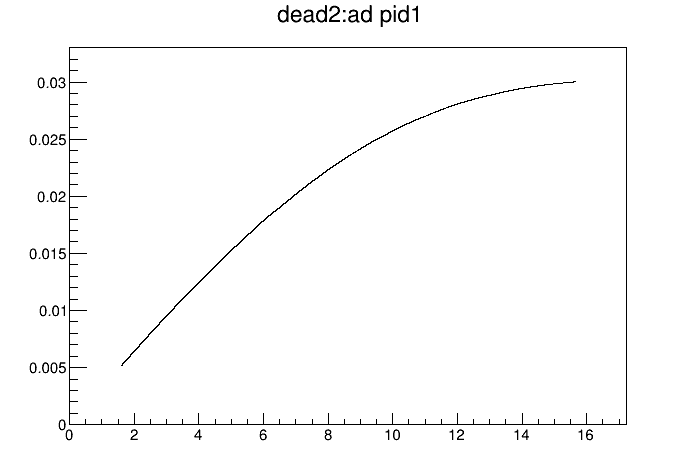

In [12]:
   c1->Clear();

   int count011=0,count012=0;
   int count211=0,count212=0;

   TGraph *pid01_1;
   TGraph *pid01_2;
   TGraph *pid21_1;
   TGraph *pid21_2;
 
   pid01_1=new TGraph;
   pid01_2=new TGraph;
   pid21_1=new TGraph;
   pid21_2=new TGraph;

   Double_t sse[4]={0,0,0,0};
   tudead->SetBranchAddress("se", sse);
   Long64_t nentries05 = tudead->GetEntries();
   for (Long64_t jentry05=1; jentry05<nentries05;jentry05++) {
      //Long64_t ientry05 = LoadTree(jentry05);
      tudead->GetEntry(jentry05);
      //if(sse[0]==0||sse[5]==0)continue;
//以ad为参考
       if(sse[0]>0.01&&sse[1]>0.01&&sse[3]<15.66)pid01_1->SetPoint(count011++,sse[1],sse[0]);
      else if(sse[0]>0&&sse[1]>0&&sse[3]>15.71)pid01_2->SetPoint(count011++,sse[1],sse[0]);
       
      if(sse[2]>0.01&&sse[1]>0.01&&sse[1]<15.3&&sse[3]<15.66)pid21_1->SetPoint(count211++,sse[1],sse[2]);
      else if(sse[2]>0&&sse[1]>0&&sse[1]<15.3&&sse[3]>15.71)pid21_2->SetPoint(count211++,sse[1],sse[2]);

   }

   //pid23_1->SetMarkerStyle(3);
   pid01_2->SetNameTitle("dead2:ad pid1","dead2:ad pid1");
   pid01_2->Draw("ap");
   c1->Draw();


   

In [13]:
Double_t xxs,ad3_thick[16];
Double_t realthick[6]={137.25,141.5,141.5,150,141.5,137.25};
char str_thick[100]="/home/zhuhy/JNBook/Experiment2022/taf/csicali/txt/taf_ad0_thickreal.txt";
ifstream in_thick(str_thick);
  if(in_thick.is_open()){
//    getline(in,ss);
    Int_t i=0; 
    while(i<16)
    {
      in_thick>>xxs>>ad3_thick[i];
      i++;
    }
  }
  in_thick.close();
for(Int_t ii=0;ii<16;ii++)ad3_thick[ii]=ad3_thick[ii]*realthick[_adnum]/150.;

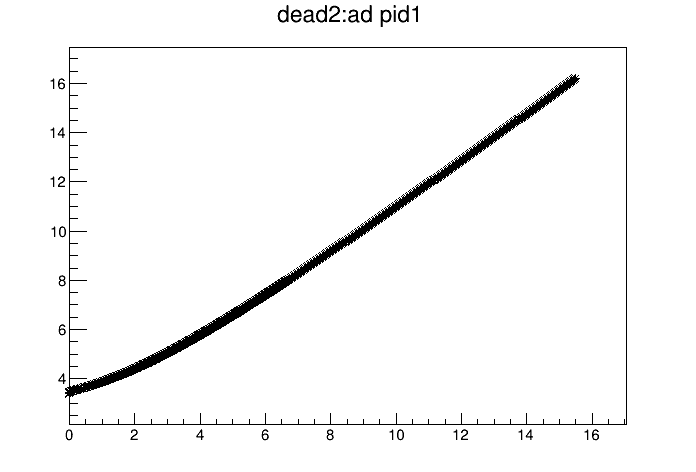

In [14]:
TFile *nudead[150];
TTree *ntudead[150];
int ncount32_1[150],ncount32_2[150];
key=0;
TGraph *npid32_1[150];
TGraph *npid32_2[150];
TString nudeadname[150];
Double_t nsse[4]={0,0,0,0};
Long64_t nnentries05;
Double_t ntempESi;
for(Int_t ii=0;ii<150;ii++){

    nudeadname[ii]= TString::Format("/home/zhuhy/zhuhy/pid/pid_tar_ads/pid3He/ad05_%03dd.root" , ii+150);
    nudead[ii]=new TFile(nudeadname[ii].Data());
    ntudead[ii]=(TTree*) nudead[ii]->Get("tree");
    ncount32_1[ii]=0;
    ncount32_2[ii]=0;
    npid32_1[ii]=new TGraph;
    npid32_2[ii]=new TGraph;
    ntudead[ii]->SetBranchAddress("se", nsse);
    nnentries05 = ntudead[ii]->GetEntries();
    key=0;
    ntempESi=0;
   for (Long64_t jentry05=1; jentry05<nnentries05;jentry05++) {
      ntudead[ii]->GetEntry(jentry05);
      if(ntempESi>nsse[2]&&nsse[2]>0)key=1;
      ntempESi=nsse[2];
      if(key==0&&nsse[2]>0)npid32_1[ii]->SetPoint(ncount32_1[ii]++,nsse[2],nsse[3]);
      else if(key==1&&nsse[2]>0)npid32_2[ii]->SetPoint(ncount32_2[ii]++,nsse[2],nsse[3]);

   }
}
   c1->Clear();
   npid32_1[20]->SetMarkerStyle(3);
   npid32_1[20]->SetNameTitle("dead2:ad pid1","dead2:ad pid1");
   npid32_1[20]->Draw("ap");
   c1->Draw();

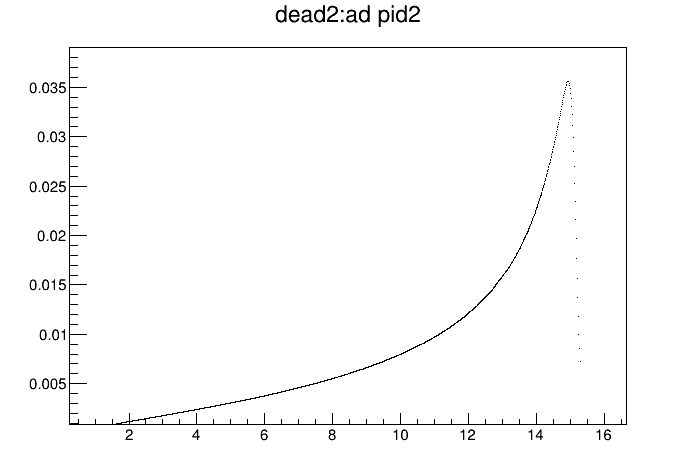

In [15]:
   c1->Clear();
   //pid23_2->SetMarkerStyle(3);
   pid21_2->SetNameTitle("dead2:ad pid2","dead2:ad pid2");
   pid21_2->Draw("ap");
   c1->Draw();

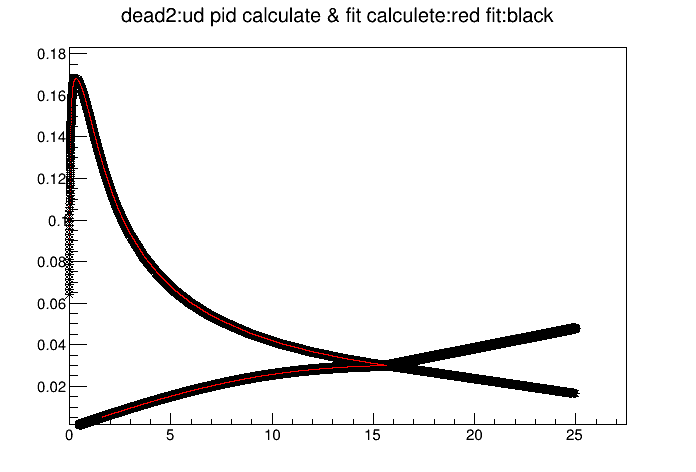

In [16]:
   TGraph *pidtry1=new TGraph;
   TGraph *pidtry2=new TGraph;
   
   Double_t ix;
   int countix1=0,countix2=0;
   for (ix=0; ix<25;ix=ix+0.001) {
     pidtry1->SetPoint(countix1++,ix,pid01_1->Eval(ix));
     pidtry2->SetPoint(countix2++,ix,pid01_2->Eval(ix));
   }
   pidtry1->SetMarkerStyle(3);
   pidtry2->SetMarkerStyle(4);
   pid01_1->SetMarkerColor(2);
   pid01_2->SetMarkerColor(2);
   pidtry1->SetNameTitle("dead2:ud pid calculate & fit calculete:red fit:black","dead2:ud pid calculate & fit calculete:red fit:black");
   pidtry1->Draw("ap");
   pidtry2->Draw("samep");
   pid01_1->Draw("samep");
   pid01_2->Draw("samep");
   c1->Draw();

In [17]:
udead->Close();

In [18]:
/*****************************************************************************************************************************************/
TFile *fout = new TFile("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntnB13_B3Hett9_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root","recreate");
fout->cd();

In [19]:
/*
Double_t uw_xne[8],uw_xs[8],ud_xne[15],ud_xs[15],us_e,csi1u_se[5],uw_xnthitt1[8][5];
Double_t dw_xne[8],dw_xs[8],dd_xne[15],dd_xs[15],ds_e,csi1d_se[5];
Double_t ang_theta;

TBranch *b_t1_uw_xne;
TBranch *b_t1_uw_xnthitt1;
TBranch *b_t1_ud_xne;
TBranch *b_t1_us_e;
TBranch *b_t1_csi1u_se;
TBranch *b_ang_theta;

fch->SetMakeClass(1);    // important!!!

fch->SetBranchAddress("uw.xne[8]", uw_xne, &b_t1_uw_xne);
fch->SetBranchAddress("uw.xnthitt1[8][5]", uw_xnthitt1, &b_t1_uw_xnthitt1);
fch->SetBranchAddress("ud.xne[15]", ud_xne, &b_t1_ud_xne);
fch->SetBranchAddress("us.e", &us_e, &b_t1_us_e);
fch->SetBranchAddress("csi1u.se[5]", csi1u_se, &b_t1_csi1u_se);

fch->SetBranchAddress("theta", &ang_theta, &b_ang_theta);

Long64_t nentries = fch->GetEntries();
TGraph *T1Etheta_new=new TGraph();
Int_t count=0;
for (Long64_t jentry=0;jentry<nentries;jentry++) {
  fch->GetEntry(jentry);
  if(jentry%100000==0)cout<<jentry<<" : "<<nentries<<" count:"<<count<<'\n';
  if(uw_xnthitt1[0][0]>-300&&uw_xnthitt1[0][0]<600){
           T1Etheta_new->SetPoint(count++,ang_theta*180/3.142,uw_xne[0]+ud_xne[0]+us_e+csi1u_se[0]);
       }
       else continue;
       //if(ds_e<dd_xne[0])denexp->Fill(dd_xne[0]);
       //if(count%100==0)cout<<"count="<<count<<"ud="<<ud_xne[0]<<" us="<<us_e<<'\n';
}
*/



In [20]:
TGraph *T1Etheta_old=new TGraph();
TGraph *T1Etheta_new=new TGraph();
TGraph *T1Etheta_new_nt=new TGraph();

TString drawName_new1 = TString::Format("angle[0]*180/3.142:(taf_ad0_xcen[0]+taf_ac0_hcen_3He[0]):taf_ac0_hcen_3He[0]");
TString drawName_new2 = TString::Format("runnumber:angle_tar20[0]*180/3.142:taf_ad0_xce[0]");
TString drawName_new3 = TString::Format("angle_tar[0]*180/3.142:t0_d3_xce[0]:taf_ac0_hcen_3He[1]");
TString drawName_new4 = TString::Format("t0_d1_yce[0]:t0_d2_yce[0]:vt0angle*180/3.142");
TString drawName_new5 = TString::Format("t0_d1_yce[0]:t0_d2_yce[0]:taf_ad0_xs[0]");
//TString drawName = TString::Format("(t1.uw.xne+t1.ud.xne+t1.us.e+t1.csi1u.se[0]):ang.theta*180/3.142");
//TString cutName_new = TString::Format("t0.d2.xnthit>-500&&t0.d2.xnthit<500");
//TString cutName_new = TString::Format("(C15_d3He_thetatheta_t1860and4500_ad0&&newtaf_ad0_ac0A_3He_14B&&Etheta_15C_d3He_1800_vme&&(B13_d1d2||B13_d1d2_01||B13_d1d2_10||B13_d1d2_11)&&((tarx+0.95)*(tarx+0.95)/(12.55*12.55)+(tary-1.05)*(tary-1.05)/(14.95*14.95))<0.95&&fabs(t0_d2_px[0]-(tarx+(t0_d1_px[0]-tarx)*113.8/100.))<4&&fabs(t0_d2_py[0]-(tary+(t0_d1_py[0]-tary)*113.8/100.))<4&&fabs(t0_d1_yce-t0_d1_xce[0])<20) ||  ((C15_d3He_thetatheta_nt1860and4500_ad0&&Etheta_15C_d3He_1800_vme&&taf_ac0_hcen_d[0]==0&&taf_ac0_hcen_d[1]==0&&fabs(taf_ad0_xce[0]-12)<6&&fabs(t0_d1_yce[0]-t0_d1_xce[0])<20&&(((tarx+0.95)*(tarx+0.95)/(12.55*12.55)+(tary-1.05)*(tary-1.05)/(14.95*14.95))<0.95&&((fabs(t0_d2_px[0]-(tarx+(t0_d1_px[0]-tarx)*113.8/100.))<4&&fabs(t0_d2_py[0]-(tary+(t0_d1_py[0]-tary)*113.8/100.))<4)))&&(B13_d1d2||B13_d1d2_01||B13_d1d2_10||B13_d1d2_11)&&t0_d1_yce[0]<115))");//newB14_2&&taf_ad0_ac0A_3He_1314B
//TString cutName_new = TString::Format("((Etheta_15C_d_3He_b_d1d2_13B_vme&&C15_d3He_thetatheta_t1860and4500_bb_ad0&&newtaf_ad0_ac0A_3He_14B&&fabs(sqrt(t0_d1_yne[0]*t0_d2_xne[0]+0.533*t0_d1_yne[0]*t0_d1_yne[0])-0.02*t0_d2_xne[0]-31411.4)<2.5*257.088&&((tarx+0.95)*(tarx+0.95)/(12.55*12.55)+(tary-1.05)*(tary-1.05)/(14.95*14.95))<10.95&&fabs(t0_d2_px[0]-(tarx+(t0_d1_px[0]-tarx)*113.8/100.))<40&&fabs(t0_d2_py[0]-(tary+(t0_d1_py[0]-tary)*113.8/100.))<40&&fabs(t0_d1_yce-t0_d1_xce[0])<20) ||  ((0&&Etheta_15C_d_3He_nta_d1d2_13B_vme&&C15_d3He_thetatheta_finall_ad0&&taf_ac0_hcen_d[0]==0&&taf_ac0_hcen_d[1]==0&&fabs(taf_ad0_xce[0]-12)<6&&fabs(t0_d1_yce[0]-t0_d1_xce[0])<20&&(((tarx+0.95)*(tarx+0.95)/(12.55*12.55)+(tary-1.05)*(tary-1.05)/(14.95*14.95))<0.95&&((fabs(t0_d2_px[0]-(tarx+(t0_d1_px[0]-tarx)*113.8/100.))<4&&fabs(t0_d2_py[0]-(tary+(t0_d1_py[0]-tary)*113.8/100.))<4)))&&fabs(sqrt(t0_d1_yne[0]*t0_d2_xne[0]+0.533*t0_d1_yne[0]*t0_d1_yne[0])-0.02*t0_d2_xne[0]-31411.4)<2.5*257.088&&t0_d1_yce[0]<215)) )&&(runnumber>=493||t0_d1_ys[0]>=16)");//newB14_2&&taf_ad0_ac0A_3He_1314B
TString cutName_new = TString::Format("((0&&C15_d3He_thetatheta_f_B13_ad0A&&Etheta_C15_d3He_t_ffinal_vme&&vt0angle*180/3.1416<8.5&&newtaf_ad0_ac0A_3He_14B&&fabs(sqrt(t0_d1_yne[0]*t0_d2_xne[0]+0.533*t0_d1_yne[0]*t0_d1_yne[0])-0.02*t0_d2_xne[0]-31411.4)<2.*257.088&&((tarx+0.95)*(tarx+0.95)/(12.55*12.55)+(tary-1.05)*(tary-1.05)/(14.95*14.95))<0.95&&fabs(t0_d2_px[0]-(tarx+(t0_d1_px[0]-tarx)*113.8/100.))<4&&fabs(t0_d2_py[0]-(tary+(t0_d1_py[0]-tary)*113.8/100.))<4&&fabs(t0_d1_yce-t0_d1_xce[0])<20) ||  ((Etheta_15C_d_3He_ntaa_d1d2_13B_vme&&C15_d3He_thetatheta_ffff_ad0&&taf_ac0_hcen_d[0]==0&&taf_ac0_hcen_d[1]==0&&fabs(taf_ad0_xce[0]-12)<6&&fabs(t0_d1_yce[0]-t0_d1_xce[0])<20&&(((tarx+0.95)*(tarx+0.95)/(12.55*12.55)+(tary-1.05)*(tary-1.05)/(14.95*14.95))<0.95&&((fabs(t0_d2_px[0]-(tarx+(t0_d1_px[0]-tarx)*113.8/100.))<4&&fabs(t0_d2_py[0]-(tary+(t0_d1_py[0]-tary)*113.8/100.))<4)))&&fabs(sqrt(t0_d1_yne[0]*t0_d2_xne[0]+0.533*t0_d1_yne[0]*t0_d1_yne[0])-0.02*t0_d2_xne[0]-31411.4)<2.*257.088&&t0_d1_yce[0]<215)) )&&(runnumber>=493||t0_d1_ys[0]>=16)");//newB14_2&&taf_ad0_ac0A_3He_1314B
//&&((abs(tarx-4.35))<(3.*8.691))&&((abs(tary-1.40))<(3.*6.579))C15_d3He_thetatheta_t1860and4500_bb_ad0&&
//TString cutName_new = TString::Format("(Ball_1||Ball_2)&&uHe3");
TString graphName_old = TString::Format("taad1_e_theta_old");
TString graphName_new = TString::Format("taad1_e_theta_new");
//getDraw2D(T1Etheta_new, drawName_new, cutName_new, graphName_new,fch);

//graphName = TString::Format("T1Etheta_BallHe3_with0_654_1380_1860_2080_4500keV");
//T1Etheta_new->SetNameTitle(drawName,graphName.Data(), graphName.Data());



In [21]:
        Int_t num1=fch->Draw(drawName_new1.Data(),cutName_new.Data());
        if(num1==0) return;
        TGraph2D *e1=new TGraph2D(num1,fch->GetV3(),fch->GetV2(),fch->GetV1());

        Int_t num2=fch->Draw(drawName_new2.Data(),cutName_new.Data());
        if(num2==0) return;
        TGraph2D *e2=new TGraph2D(num2,fch->GetV3(),fch->GetV2(),fch->GetV1());

        Int_t num3=fch->Draw(drawName_new3.Data(),cutName_new.Data());
        if(num3==0) return;
        TGraph2D *e3=new TGraph2D(num3,fch->GetV3(),fch->GetV2(),fch->GetV1());

        Int_t num4=fch->Draw(drawName_new4.Data(),cutName_new.Data());
        if(num4==0) return;
        TGraph2D *e4=new TGraph2D(num4,fch->GetV3(),fch->GetV2(),fch->GetV1());

        Int_t num5=fch->Draw(drawName_new5.Data(),cutName_new.Data());
        if(num5==0) return;
        TGraph2D *e5=new TGraph2D(num5,fch->GetV3(),fch->GetV2(),fch->GetV1());
//利用上一步相同cut中画的事件顺序一致

        Int_t npoints1=e1->GetN();
        Int_t npoints2=e2->GetN();
        Int_t npoints3=e3->GetN();
        Int_t npoints4=e3->GetN();
        Int_t npoints5=e3->GetN();
        if(npoints1==0) return;
        cout<<"npoints1="<<npoints1<<" npoints2="<<npoints2<<" npoints3="<<npoints3<<" npoints4="<<npoints4<<" npoints5="<<npoints5<<'\n';
/*        TGraph2D *g2D=new TGraph2D(*e1);
        TString tmpgName;
        tmpgName="g2D"+graphName_new;
        g2D->SetNameTitle(tmpgName.Data(), tmpgName.Data());
*/
        Double_t *gac=e1->GetX();
        Double_t *geall=e1->GetY();
        Double_t *gang=e1->GetZ();
        Double_t *gad=e2->GetX();
        Double_t *gang_tar=e2->GetY();
        Double_t *grun=e2->GetZ();
        Double_t *gacB=e3->GetX();
        Double_t *gt0d3=e3->GetY();
        Double_t *gang0=e3->GetZ();
        Double_t *gt0d1=e4->GetZ();
        Double_t *gt0d2=e4->GetY();
        Double_t *gt0ang=e4->GetX();
        Double_t *gxs=e5->GetX();
    
//TGraph *T1Etheta_new=new TGraph();
TH1D *e_t0_add_taf=new TH1D("e_t0_add_taf","e_t0_add_taf",50,300,500); 
TH1D *e_t0_add_taf2=new TH1D("e_t0_add_taf2","e_t0_add_taf2",50,300,500); 

Warning in <TFile::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).


npoints1=120 npoints2=120 npoints3=120 npoints4=120 npoints5=120


Warning in <TFile::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).


In [22]:
for(Int_t ii=0; ii<npoints1; ii++){
   T1Etheta_old->SetPoint(ii,gang[ii],geall[ii]);
 }

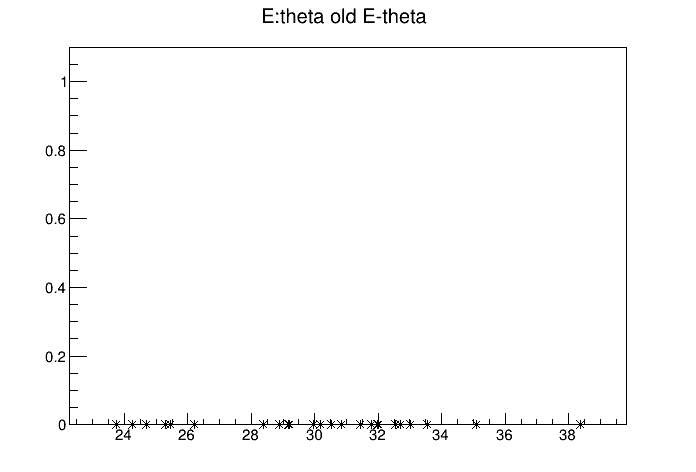

In [23]:

T1Etheta_old->SetMarkerStyle(3);
T1Etheta_old->SetNameTitle("E:theta old E-theta","E:theta old E-theta");
T1Etheta_old->Draw("ap");
lise->SetMarkerColor(2);
lise->Draw("samep");
c1->SetName("T1Etheta_old");
c1->Draw();
c1->Write();


In [24]:
 /*for (ix=0; ix<54.8;ix=ix+0.1) {
     pidtry->SetPoint(count1++,ix,pid05_1->Eval(ix));
     if(ix>8)pidtry->SetPoint(count1++,ix,pid05_2->Eval(ix));
   }
*/

TGraph *edelta_d=new TGraph();
TGraph *e_dall=new TGraph();
TGraph *edelta_s=new TGraph();
TGraph *edelta_tar=new TGraph();
TGraph *e_ds_tar_delta=new TGraph();
TGraph *e_ds_tar_all=new TGraph();
TGraph *e_ds_before=new TGraph();
TGraph *ad_ac=new TGraph();
TGraph *g_xs=new TGraph();

Double_t Etemp=0;
Int_t count=0,count_nt=0,countd=0,counts=0,counttar=0;
Double_t eall,ealltemp,ealltemp_tar,etar=0;
Double_t _thick,*entar;
entar=&etar;
Int_t therthick=0;
Int_t thexs=-1;
int AA=3,ZZ=2;
Double_t Ebeammax=400.;
Double_t Ebeammin=450.;
Int_t gokey=0;
char str3He[100]="/home/zhuhy/JNBook/15C_Etheta/T1_E_theta/txt/3He-CD2.txt";

for(Int_t i=0; i<npoints1; i++){
    if(!(gac[i]>0))goto _end;                     //注意检查条件是否正确，什么是有信号，什么是没信号
    if(!(gang[i]>0))continue;
    //ealltemp=eall=geall[i];
    ad_ac->SetPoint(countd++,gac[i],gad[i]);
if(gad[i]>0>0&&gac[i]>0)ealltemp=eall=gad[i]+gac[i];
    
//矫死层
if((gac[i]>0)&&(gac[i]>0)){
   eall=eall+pid01_2->Eval(gad[i])+pid21_2->Eval(gad[i]);
    
   if((eall-ealltemp)>0)edelta_s->SetPoint(counts++,ealltemp,(eall-ealltemp));
}
                                                                        //用总能量去推测在死层里的沉积能量（阶跃）
    
 
ealltemp_tar=eall;
//靶里能损
if(grun[i]<700)_thick=23.35/TMath::Cos((gang_tar[i])*TMath::DegToRad());            //36? mg/cm2=>
else if(grun[i]>700)_thick=59.65/TMath::Cos((gang0[i])*TMath::DegToRad()); 
//cout<<" cos(ang-30):"<<TMath::Cos((gang[i]-30)*TMath::DegToRad());

    if((eall-ealltemp)>0.5){
       //cout<<" error_μ:"<<(eall-ealltemp)/eall<<" ad："<<gad[i]<<" ac："<<gac[i]<<" eall:"<<geall[i]<<'\n';
       //continue;
   }
    
    tarloss(entar,AA,str3He,_thick,eall);
    eall=eall+*entar;
    edelta_tar->SetPoint(counttar++,ealltemp,*entar);

   

   cout<<" μ:"<<(eall-ealltemp)/eall<<" ad："<<gad[i]<<" ac："<<gac[i]<<" eall:"<<geall[i]<<" ang="<<(gang[i])<<" *tar="<<*entar<<'\n';
   //cout<<" eall_now:"<<eall<< " μ="<<(eall-ealltemp)/eall<<'\n';
   e_ds_tar_delta->SetPoint(count,ealltemp,(eall-ealltemp));
    
   if((gac[i]>0)&&(gac[i]>0))e_ds_tar_all->SetPoint(count,ealltemp,(eall-ealltemp)+gad[i]+gac[i]);
   if((gac[i]>0)&&(gac[i]>0))e_ds_before->SetPoint(count,ealltemp,*entar+gad[i]+gac[i]);
   if(gang[i]>0.0001&&!((gang[i]+0.635)>31&&gac[i]==0&&gacB[i]==0)){
   if(grun[i]>492&&grun[i]<700)gang[i]+=100;
       if(gt0d3[i]>0.1){
           e_t0_add_taf->Fill((eall+(gt0d1[i]+gt0d2[i]+gt0d3[i])*14./13.+1.07  +15.59 +3.18));
           if((eall+(gt0d1[i]+gt0d2[i]+gt0d3[i])*14./13.+1.07  +15.59 +3.18)>Ebeammax)T1Etheta_new->SetPoint(count++,gang[i],eall);
       }
       else {
           e_t0_add_taf->Fill((eall+(gt0d1[i]+gt0d2[i])*14./13.+1.07  +15.59 +3.18));
           cout<<(eall+(gt0d1[i]+gt0d2[i])*14./13+1.07  +15.59 +3.18)<<'\n';
           if((eall+(gt0d1[i]+gt0d2[i])*14./13+1.07  +15.59 +3.18)>Ebeammax&&(eall+(gt0d1[i]+gt0d2[i])*14./13+1.07  +15.59 +3.18)<Ebeammin)T1Etheta_new->SetPoint(count++,gang[i],eall);
       }
   }
    
_end:
   if(gac[i]==0&&gacB[i]==0){
       if(fabs(gad[i]-Etemp)<0.00001)continue;
       Etemp=gad[i];
    g_xs->SetPoint(count_nt,gxs[i],gxs[i]);
       cout<<gang[i]<<'\t'<<gad[i]<<'\t'<<gxs[i]<<'\n';
    T1Etheta_new_nt->SetPoint(count_nt++,gang[i],gad[i]);
    if(grun[i]<700)therthick=(Int_t)(150./TMath::Cos((gang_tar[i])*TMath::DegToRad()));
    else if(grun[i]>700)therthick=(Int_t)(150./TMath::Cos((gang0[i])*TMath::DegToRad()));
    if(therthick<150||therthick>=300){cout<<"!!!!!!!!!!!!!!!!!!!!!therthick="<<therthick<<'\t'<<"angle="<<gang_tar[i]<<'\n';continue;}
    if((gang[i]+0.635)>31.){eall=npid32_2[therthick-150]->Eval(gad[i]+1.5)-1-1;}
    if((gang[i]+0.635)<=31.){
        eall=npid32_1[therthick-150]->Eval(gad[i])+0.;
        if(eall<11.5)eall=npid32_2[therthick-150]->Eval(gad[i]+1.5)-1-1;
    }
   if(grun[i]>492&&grun[i]<700)gang[i]+=100;
    if(abs(ealltemp-eall)>0.0001){
        if(gt0d3[i]>0.1){
            e_t0_add_taf2->Fill((eall+(gt0d1[i]+gt0d2[i]+gt0d3[i])*14./13.+1.07  +15.59 +3.18));
            if((eall+(gt0d1[i]+gt0d2[i]+gt0d3[i])*14./13.+1.07  +15.59 +3.18)>Ebeammax)T1Etheta_new->SetPoint(count++,gang[i],eall);
        }
        else {
           e_t0_add_taf2->Fill((eall+(gt0d1[i]+gt0d2[i])*14./13.+1.07  +15.59 +3.18));
            if((eall+(gt0d1[i]+gt0d2[i])*14./13.+1.07  +15.59 +3.18)>Ebeammax)T1Etheta_new->SetPoint(count++,gang[i],eall);
        }
        //cout<<"before: E_ad="<<gad[i]<<'\t'<<"after: E_all="<<eall<<'\t'<<"angle="<<gang[i]<<'\n';
    }
       ealltemp=eall;
   }
    
 }
 cout<<"count="<<count<<'\n';  
TF1 *g1 = new TF1("g1","gaus");

28.3831	12.5546	0
32.002	7.70083	2
25.4393	6.258	1
30.1685	9.52292	0
31.4476	7.42126	1
23.7349	13.5586	0
31.8026	11.0486	2
33.0164	12.9146	3
30.5302	12.8672	4
29.1711	12.8361	1
29.2114	11.8149	1
28.9011	11.8325	2
30.8496	10.141	1
31.9815	10.887	3
26.2028	11.408	1
32.5322	13.7714	2
32.6876	12.3692	1
24.2665	13.8301	1
33.5381	11.2853	3
24.7042	8.18038	1
38.3593	6.68525	4
25.3071	12.1155	0
29.9489	13.6635	1
35.0915	13.1435	4
count=16


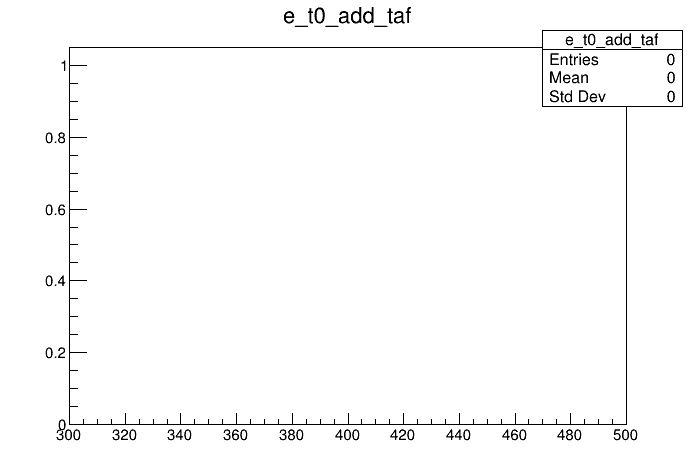

Warning in <Fit>: Fit data is empty 


In [25]:

c1->Clear();
e_t0_add_taf->Draw();
e_t0_add_taf->Fit("g1","","",400,460);
c1->Draw();

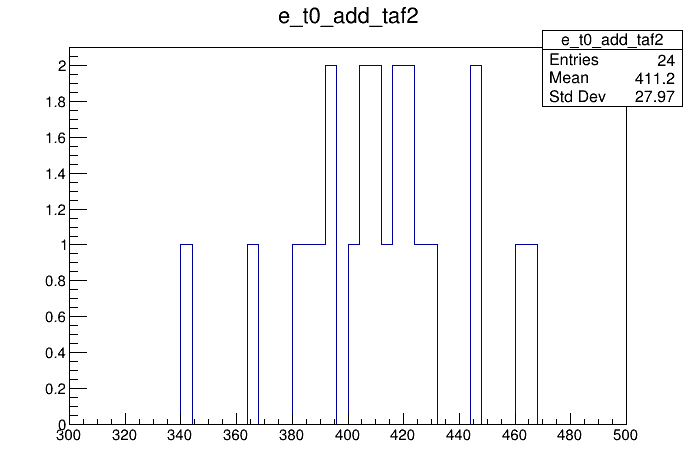

In [26]:
//TF1 *g1 = new TF1("g1","gaus");
c1->Clear();
e_t0_add_taf2->Draw();
//e_t0_add_taf->Fit("g1","","",415,450);
c1->Draw();

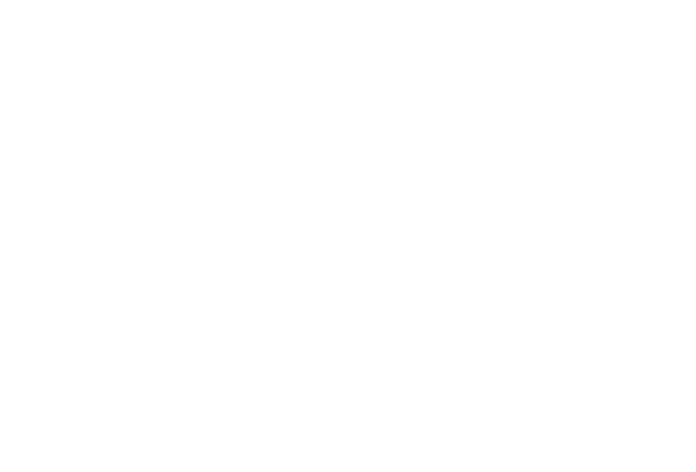

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [27]:
c1->Clear();
ad_ac->SetMarkerStyle(3);
ad_ac->SetNameTitle("ac_ac","ac_ac");
ad_ac->Draw("ap");
c1->Draw();

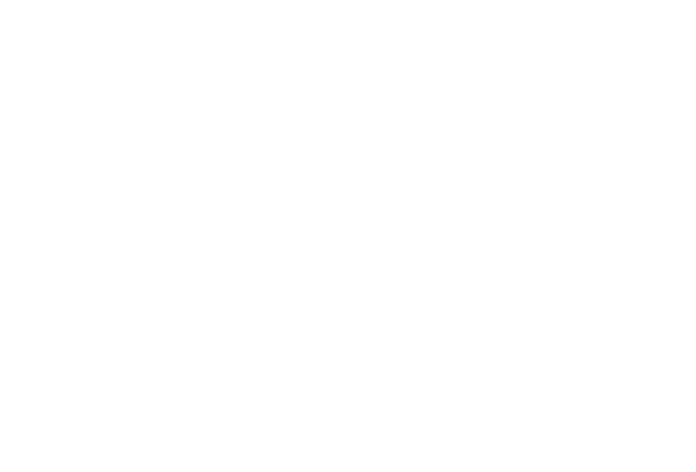

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [28]:
c1->Clear();
edelta_s->SetNameTitle("e_delta:eall delta by s","e_delta:eall delta by s");
edelta_s->SetMarkerStyle(3);
edelta_s->SetMarkerColor(2);
edelta_s->Draw("ap");
edelta_d->Draw("samep");
c1->Draw();

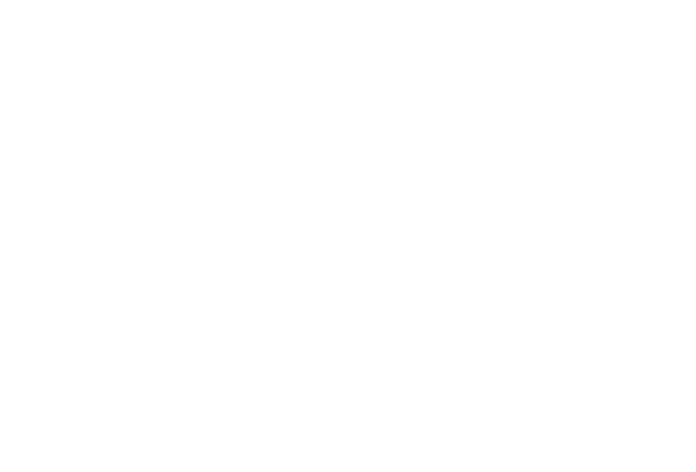

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [29]:
edelta_tar->SetNameTitle("edelta_tar:eall","edelta_tar:eall");
edelta_tar->Draw("ap");        //check by lise
c1->Draw();

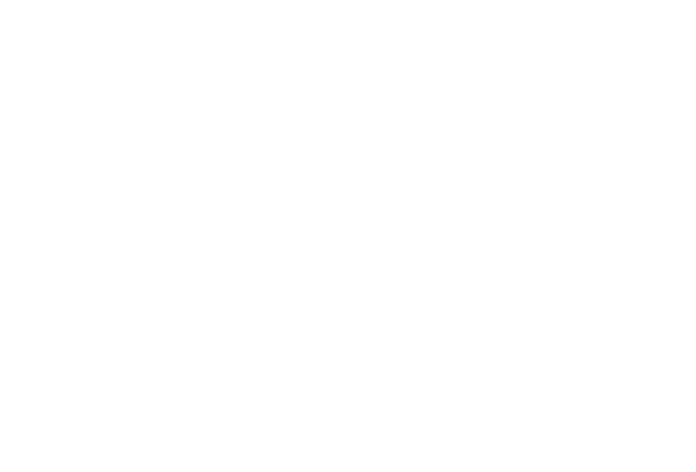

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [30]:
e_ds_tar_delta->SetNameTitle("(edelta_ds+edelta_tar):eall","(edelta_ds+edelta_tar):eall");
e_ds_tar_delta->Draw("ap");
c1->Draw();
//下方的是ang=nan的无效信号，e_tar_delta=0 e_ds_tar_delta=e_tar_delta+e_ds_delta故与上方信号形状一致但低很多

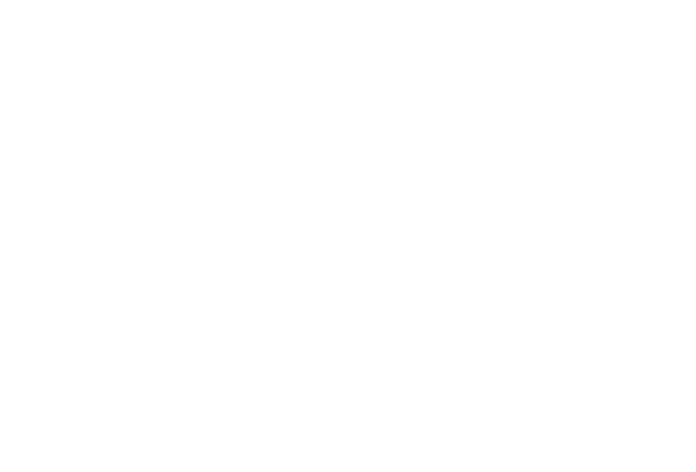

0

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [31]:
e_ds_tar_all->SetNameTitle("eall:eall_before eall=eall_before+edelta_ds+edelta_tar","eall:eall_before eall=eall_before+edelta_ds+edelta_tar");
e_ds_tar_all->Draw("ap");
cout<<e_ds_tar_all->GetN();
c1->Draw();

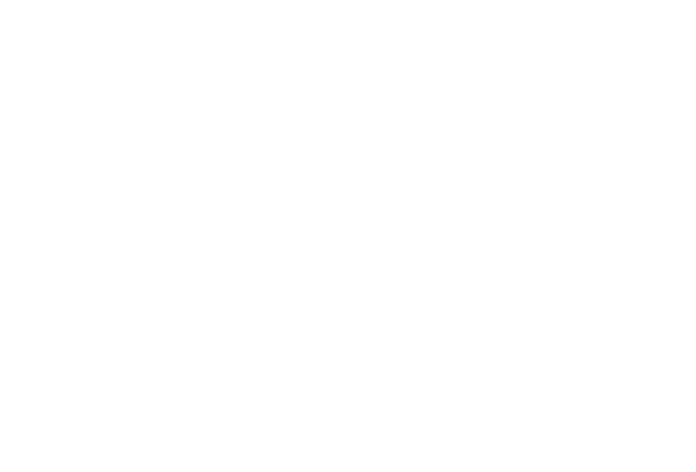

0

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [32]:
e_ds_before->SetNameTitle("eall_ds:eall_before eall=eall_before+edelta_ds","eall:eall_before eall=eall_before+edelta_ds");
e_ds_before->Draw("ap");
cout<<e_ds_before->GetN();
c1->Draw();

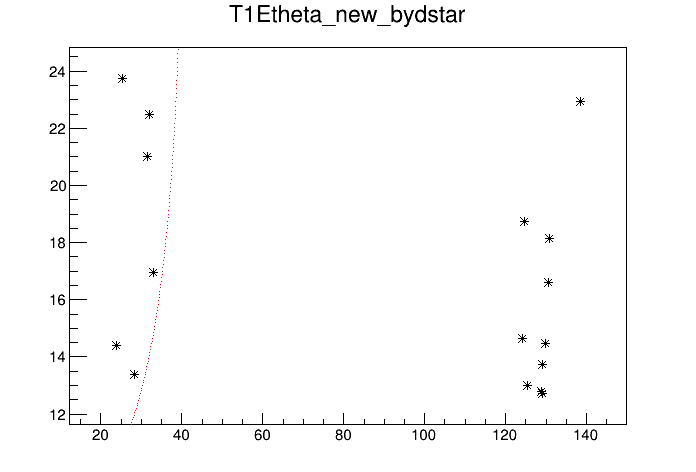

In [33]:
T1Etheta_new->SetMarkerStyle(3);
T1Etheta_new->SetNameTitle("T1Etheta_new_bydstar","T1Etheta_new_bydstar");

T1Etheta_new->Draw("ap");
T1Etheta_new->Write();
lise->SetMarkerColor(2);
lise->Draw("samep");
c1->SetName("T1Etheta_new");
c1->Draw();
c1->Write();

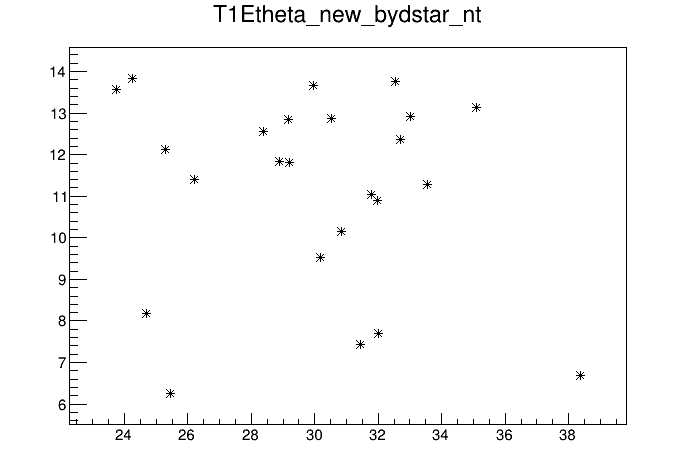

In [34]:
c1->Clear();
T1Etheta_new_nt->SetMarkerStyle(3);
T1Etheta_new_nt->SetNameTitle("T1Etheta_new_bydstar_nt","T1Etheta_new_bydstar_nt");

T1Etheta_new_nt->Draw("ap");
T1Etheta_new_nt->Write();
c1->Draw();
c1->Write();

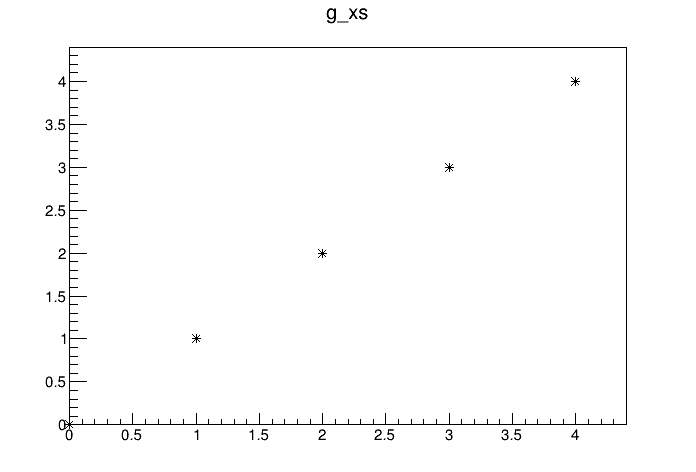

In [35]:
c1->Clear();
g_xs->SetMarkerStyle(3);
g_xs->SetNameTitle("g_xs","g_xs");

g_xs->Draw("ap");
g_xs->Write();
c1->Draw();
c1->Write();

In [36]:
//Q = (ma/mB− 1 )Ea + (mb/mB+ 1 )Eb −2cos/mB*sqr(ma*mb*Ea*Eb)
//15C+d->3He+14B      a=15C A=d b=3He  B=14B
//ma=15.0105993 mb=3.01602932265 mB=14.025404 Ea=27 MeV Eb_Etheta

In [37]:
fout->Close();